In [1]:
import numpy as np
import random
# Set seed for reproducibility
np.random.seed(42)  # Set seed for NumPy
random.seed(42) # Set seed for random module

## Introduction

So far we have only worked with what we call "structured" data, meaning the information was always stored in a tabular form where each instance (row) contained the same properties (columns). However, estimates suggest that about 80% of today's data is unstructured.

Unlike structured data, which is tidy and mostly numeric in content, unstructured data is mainly textual or visual and, therefore, messy. The task of extracting knowledge from text documents, known as text analysis or natural language understanding, is highly complex and still limited by the ability of computers to understand the subtleties of human languages.

One popular task in natural language processing (NLP) is `Sentiment Analysis`, which tries to extract the sentiment (e.g., positive, negative, etc.) of a given text (e.g., tweet).

In this weeks tutorial we will start working with textual data, go through the necessary `Preprocessing` steps for the computer to be able to understand the information and lastly apply `dictionary-based Sentiment Analysis` to the texts in order to extract their sentiment.

## Data

The dataset we will use contains movie reviews from IMDB. Initially the data is stored as a dataframe with three columns (id, sentiment_human, text).


Run the code below.

In [ ]:
import pandas as pd
#Loading the data from a csv file
reviews = pd.read_csv("https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/imdb_sample.csv")

### Display Document

First of all, let's have a look at the raw data. The raw data contains an ID, a human sentiment (positive or negative), and the corresponding review text.

Run the code below to get first insights on the reviews.

In [3]:
reviews.head()

,id,sentiment_human,text
0,5814_8,positive,With all this stuff going down at the moment w...
1,2381_9,positive,"\""The Classic War of the Worlds\"" by Timothy H..."
2,7759_3,negative,The film starts with a manager (Nicholas Bell)...
3,3630_4,negative,It must be assumed that those who praised this...
4,9495_8,positive,Superbly trashy and wondrously unpretentious 8...


## Preprocessing
Since unstructured data doesn't have an inherent and consistent structure we have to perform some preprocessing steps in order to make the data usable for the computer.
One thing to keep in mind is that the more preprocessing we perform the more information we lose, but the basic methods we are using here require it.

### Tokenize documents
First, we tokenize the texts. This means we transform the texts from one long string to a list of tokens. Additionally we also start removing unwanted characters (e.g punctuation between sentences, numbers, etc.).
For a full list and explanation of the used parameters you can have a look at the documentation.

### Stem all words
After tokenizing the texts we perform stemming (alternatively lemmatization could be performed). Stemming reduces every word to its stem.
The stemmer we use here is the Porter Stemmer.

### Remove stopwords
Finally we remove words that don't contain real meaning and are commonly used (e.g. 'this', 'the', 'a', etc.).

Run the code below.



In [ ]:
# Preprocessing
import nltk
import string

# Download the necessary nltk resource
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


#Define function with all necessary preprocessing steps for our IMDB reviews.
def preprocess(text):
    # tokenize the text
    tokens = nltk.word_tokenize(text)

    # create stemmer object
    stemmer = nltk.stem.PorterStemmer()

    # stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # get list of stopwords in English
    stopwords = nltk.corpus.stopwords.words("english")

    # remove stopwords
    filtered_tokens = [token for token in stemmed_tokens if token.lower() not in stopwords]
    
    # remove punctuation
    filtered_tokens_nopunct = [token for token in filtered_tokens if token not in string.punctuation]

    return filtered_tokens_nopunct

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katharinabrennig/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katharinabrennig/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/katharinabrennig/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Apply preprocessing

After defining the different preprocessing steps, we now apply these preprocessing steps to our IMDB reviews. Running the code below we apply the preprocess function to the "text" column of our data and save the new preprocessed reviews as a new column in our dataset.

In [5]:
reviews['tokens'] = reviews['text'].apply(preprocess)

#show tokens for the first review in our dataset to get some insights
reviews.iloc[0]

id                                                            5814_8
sentiment_human                                             positive
text               With all this stuff going down at the moment w...
tokens             [thi, stuff, go, moment, mj, 've, start, liste...
Name: 0, dtype: object

In [6]:
#show review data with new column tokens
reviews.head()

,id,sentiment_human,text,tokens
0,5814_8,positive,With all this stuff going down at the moment w...,"[thi, stuff, go, moment, mj, 've, start, liste..."
1,2381_9,positive,"\""The Classic War of the Worlds\"" by Timothy H...","['', classic, war, worlds\, '', timothi, hine,..."
2,7759_3,negative,The film starts with a manager (Nicholas Bell)...,"[film, start, manag, nichola, bell, give, welc..."
3,3630_4,negative,It must be assumed that those who praised this...,"[must, assum, prais, thi, film, '', greatest, ..."
4,9495_8,positive,Superbly trashy and wondrously unpretentious 8...,"[superbl, trashi, wondrous, unpretenti, 80, 's..."


## Dictionary-Based Sentiment Analysis
`Dictionary-based Sentiment Analysis` works by looking up the sentiment of each word occurring in a text in a `sentiment dictionary`. Afterwards the single sentiment scores are summed up to evaluate the text's sentiment.

## NRC Sentiment Dictionary

### Load NRC sentiment dictionary
We use the NRC sentiment dictionary. This dictionary contains ten classes: anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise and trust.
Currently we are only interested in positive and negative words.

Run the code below.

In [ ]:
# Load NRC Emotion Lexicon
nrc_df = pd.read_csv('https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'emotion', 'association'])

# Filter out rows where association is 0
nrc_df = nrc_df[nrc_df['association'] == 1]

# Define positive and negative emotion categories
positive_emotions = {'positive'}
negative_emotions = {'negative'}

# Filter words by emotion category and collect unique words for each sentiment orientation
positive_words = nrc_df[nrc_df['emotion'].isin(positive_emotions)]['word'].unique()
negative_words = nrc_df[nrc_df['emotion'].isin(negative_emotions)]['word'].unique()



### Sample from dictionary
We can look at an excerpt of the positive words contained in the dictionary.

Run the code below.

In [8]:
positive_words[:10]

array(['abacus', 'abandonment', 'abba', 'abbot', 'abduction', 'ability',
       'abovementioned', 'abrupt', 'absolute', 'absolution'], dtype=object)

### Stem the positive and negative dictionaries
The tokens in the dictionary aren't stemmed per default. Since we stemmed the tokens in our data, we also stem the positive and negative words in the dictionary.

Run the code below.

In [9]:
# Initialize the Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# Stem the words in each list
positive_words_stemmed = [stemmer.stem(word) for word in positive_words]
negative_words_stemmed = [stemmer.stem(word) for word in negative_words]


positive_words_stemmed[:10]

['abacu',
 'abandon',
 'abba',
 'abbot',
 'abduct',
 'abil',
 'abovement',
 'abrupt',
 'absolut',
 'absolut']

### Look-up remaining tokens in NRC dictionary and transform results to data frame
If you want to perform the analysis with the unstemmed tokens you can copy the needed code parts to the summary section and use the unstemmed reviews as input and remove the stemming from the preprocessing to use the unstemmed tokens. Additionally you will have to set stemmed_dict = False.

Which procedure yields more accurate results and what do you believe to be the reason for the outcome?

Run the code below.

In [10]:
# Create a dictionary with both stemmed and unstemmed words for sentiment analysis
sentiment_dict = {
    'positive': list(positive_words),
    'negative': list(negative_words),
    'positive_stemmed': positive_words_stemmed,
    'negative_stemmed': negative_words_stemmed
}

def sentiment_lookup(tokens, sentiment_dict, stemmed_dict=True):
    if stemmed_dict:
        # Use stemmed versions of the dictionary
        positive_words = sentiment_dict['positive_stemmed']
        negative_words = sentiment_dict['negative_stemmed']
    else:
        # Use original versions of the dictionary
        positive_words = sentiment_dict['positive']
        negative_words = sentiment_dict['negative']
    
    # Count positive and negative word matches
    positive_count = sum(1 for token in tokens if token in positive_words)
    negative_count = sum(1 for token in tokens if token in negative_words)
    
    return positive_count, negative_count

#Use the preprocessed reviews as input, which we saved as "tokens" in our data, to perform the lookup
reviews_toks_stemmed = reviews['tokens']

# Perform lookup with stemmed dictionary
results = [sentiment_lookup(review, sentiment_dict, stemmed_dict=True) for review in reviews_toks_stemmed]
df_results = pd.DataFrame(results, columns=['positive_count', 'negative_count'])
print("Results with Stemmed Dictionary:")
print(df_results)


Results with Stemmed Dictionary:
      positive_count  negative_count
0                 53              39
1                 26               5
2                 57              48
3                 51              26
4                 51              39
...              ...             ...
4995              25              12
4996              25              12
4997              27              16
4998              17              11
4999              22               8

[5000 rows x 2 columns]


### Calculate overall sentiment score
After looking up the sentiment for the remaining tokens of each text we can now aggregate them by simply subtracting the number of negative words from the number of positive words found.

Run the code below.

In [11]:
#Get a quick overview of the positive and negative results
df_results.describe()

,positive_count,negative_count
count,5000.000000,5000.000000
mean,31.613800,19.301800
std,24.080918,15.816597
min,0.000000,0.000000
25%,16.000000,9.000000
50%,24.000000,15.000000
75%,39.000000,24.000000
max,334.000000,245.000000


In [12]:
# Calculate sentiment algorithm score (positive - negative)
df_results['sentiment_algo_score'] = df_results['positive_count'] - df_results['negative_count']

# Print the results with sentiment scores
print("Results DataFrame:")
print(df_results)

Results DataFrame:
      positive_count  negative_count  sentiment_algo_score
0                 53              39                    14
1                 26               5                    21
2                 57              48                     9
3                 51              26                    25
4                 51              39                    12
...              ...             ...                   ...
4995              25              12                    13
4996              25              12                    13
4997              27              16                    11
4998              17              11                     6
4999              22               8                    14

[5000 rows x 3 columns]


### Scale sentiment score by number of emotional words in a review

Run the code below.

In [34]:
df_results['sentiment_algo_scaled'] = df_results['sentiment_algo_score'] / (df_results['positive_count'] + df_results['negative_count'])
df_results.fillna({'sentiment_algo_scaled': 0}, inplace=True)
df_results['sentiment_algo_scaled'].describe()

count    5000.000000
mean        0.252911
std         0.190534
min        -1.000000
25%         0.131843
50%         0.250000
75%         0.373134
max         1.000000
Name: sentiment_algo_scaled, dtype: float64

### Calculate binary sentiment label
Similarly to classification we still have to decide which label to assign to each instance because until now we only have calculated their sentiment scores. Because we scaled the scores in the previous cell we can infer that scores greater than 0 indicate a positive sentiment and otherwise a negative sentiment.

Our model predicts 685 negative reviews and 4315 positive reviews.

Run the code below.

In [36]:
df_results['sentiment_algo_binary'] = ['positive' if x > 0 else 'negative' for x in df_results['sentiment_algo_scaled']]
df_results['sentiment_algo_binary'].value_counts()


positive    4532
negative     468
Name: sentiment_algo_binary, dtype: int64

### Show distribution of human sentiment lables
As a reference we can also display the ground truth distribution of positive and negative reviews, which is represented through the column "sentiment_human" in our dataset. We can see that our model predicts a lot more positive reviews than contained in the dataset. (What could be a possible reason?)

Run the code below.

In [15]:
reviews['sentiment_human'].value_counts()

positive    2517
negative    2483
Name: sentiment_human, dtype: int64

### Evaluate accuracy with human sentiment lables as ground truth
Since the task at hand is classification (the only difference lies in the type of input data) we can evaluate our model in the same way as we did before.

Run the code below.

In [16]:
reviews_df_sent, results_df_bin = pd.DataFrame(reviews['sentiment_human']), pd.DataFrame(df_results['sentiment_algo_binary'])

Accuracy (NRC): 0.557


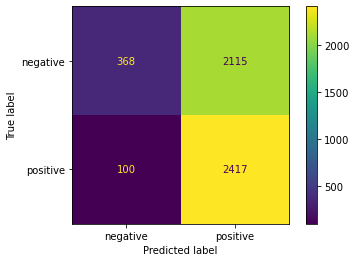

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

#Compute accuracy
accuracy_nrc = accuracy_score(reviews_df_sent['sentiment_human'], results_df_bin['sentiment_algo_binary'])
print("Accuracy (NRC):", accuracy_nrc)

#Compute confusion matrix of human sentiment and algorithm sentiment
ConfusionMatrixDisplay.from_predictions(reviews_df_sent['sentiment_human'], results_df_bin['sentiment_algo_binary'])


## Vader Dictionary

### Load Vader Dictionary

We install the Vader package first, as it is not natively supported on google colab

In [18]:
# Installing the Vader Package 
!pip install vaderSentiment

We load the Vader (Valence Aware Dictionary and Sentiment Reasoner) model. It is a rule-based sentiment analysis tool that is specifically designed for analyzing social media texts. Vader is a pre-trained sentiment analysis model that provides a sentiment score for a given text.

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa_classifier = SentimentIntensityAnalyzer()

### Preprocessing

Similar as before we tokenize the texts first, remove stopwords, and punctuation. The difference to before is that we do not perform stemming. Further we return the preprocessed tokens as a whole string and not a list of tokens as Vader expects a complete string as input.

In [20]:
def preprocess(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Get the list of stopwords in English
    stopwords = nltk.corpus.stopwords.words("english")

    # Remove stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]

    # Remove punctuation
    filtered_tokens_nopunct = [token for token in filtered_tokens if token not in string.punctuation]

    return " ".join(filtered_tokens_nopunct)


Applying the preprocessing on the text and save the preprocessed text in a new column called 'text_prep'.

In [21]:
reviews['text_prep'] = reviews['text'].apply(preprocess)

### Dataunderstanding

Taking a closer look how the prepared text for a positive and negative review looks.

In [37]:
print(reviews.iloc[0]['text_prep'])
print("===")
print(reviews.iloc[0]['sentiment_human'])

stuff going moment MJ 've started listening music watching odd documentary watched Wiz watched Moonwalker Maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent Moonwalker part biography part feature film remember going see cinema originally released subtle messages MJ 's feeling towards press also obvious message drugs bad m'kay. br br Visually impressive course Michael Jackson unless remotely like MJ anyway going hate find boring may call MJ egotist consenting making movie MJ fans would say made fans true really nice him. br br actual feature film bit finally starts 20 minutes excluding Smooth Criminal sequence Joe Pesci convincing psychopathic powerful drug lord wants MJ dead bad beyond MJ overheard plans Nah Joe Pesci 's character ranted wanted people know supplying drugs etc dunno maybe hates MJ 's music. br br Lots cool things like MJ turning car robot whole Speed Demon sequence Also director must patience saint came filming kiddy 

In [ ]:
print(reviews.iloc[2]['text_prep'])
print("===")
print(reviews.iloc[2]['sentiment_human'])

film starts manager Nicholas Bell giving welcome investors Robert Carradine Primal Park secret project mutating primal animal using fossilized DNA like Jurassik Park scientists resurrect one nature 's fearsome predators Sabretooth tiger Smilodon Scientific ambition turns deadly however high voltage fence opened creature escape begins savagely stalking prey human visitors tourists scientific.Meanwhile youngsters enter restricted area security center attacked pack large pre-historical animals deadlier bigger addition security agent Stacy Haiduk mate Brian Wimmer fight hardly carnivorous Smilodons Sabretooths course real star stars astounding terrifyingly though convincing giant animals savagely stalking prey group run afoul fight one nature 's fearsome predators Furthermore third Sabretooth dangerous slow stalks victims. br br movie delivers goods lots blood gore beheading hair-raising chills full scares Sabretooths appear mediocre special effects.The story provides exciting stirring ent

### Distribution of the reviews

Running the code below will give us an overview of how the human sentiment is distributed among the data.

<AxesSubplot:xlabel='sentiment_human', ylabel='count'>

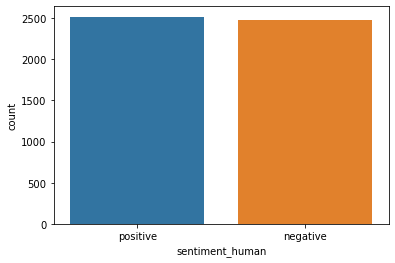

In [41]:
import seaborn as sns

sns.countplot(data=reviews, x="sentiment_human")

In [ ]:
#count absolute human sentiment for the reviews
reviews["sentiment_human"].value_counts()

positive    2517
negative    2483
Name: sentiment_human, dtype: int64

In [ ]:
#calculate the relative human sentiment for the reviews
reviews["sentiment_human"].value_counts()/reviews.shape[0]

positive    0.5034
negative    0.4966
Name: sentiment_human, dtype: float64

### Determine the sentiment with the model on the reviews

The code below retrieves preprocessed text (text_prep) from the data (X) and uses VADER's polarity_scores to compute sentiment scores (neg, neu, pos, compound) for one specific review. This will give us some insights on how VADER works.

In [44]:
print(reviews.iloc[1]["text_prep"])
vader_sa_classifier.polarity_scores(reviews.iloc[1]["text_prep"])

'' Classic War Worlds\ '' Timothy Hines entertaining film obviously goes great effort lengths faithfully recreate H. G. Wells classic book Mr. Hines succeeds watched film appreciated fact standard predictable Hollywood fare comes every year e.g Spielberg version Tom Cruise slightest resemblance book Obviously everyone looks different things movie envision amateur '' critics\ '' look criticize everything Others rate movie important bases like entertained people never agree '' critics\ '' enjoyed effort Mr. Hines put faithful H.G Wells classic novel found entertaining made easy overlook '' critics\ '' perceive shortcomings


{'neg': 0.104, 'neu': 0.55, 'pos': 0.347, 'compound': 0.9808}

In [45]:
#print the human sentiment for this review
print(reviews.iloc[1]["sentiment_human"])

positive


The code below now predicts the sentiment based reviews. Therefore the code iterates through each row of the dataset (X), calculates sentiment scores using VADER's polarity_scores on the preprocessed text (text_prep), classifies the sentiment as "positive" (if compound > 0) or "negative" otherwise, and stores the results in the y_vader list.

In [46]:
sentiment_vader = []
for index, row in reviews.iterrows():
    vs = vader_sa_classifier.polarity_scores(row["text_prep"])
    if vs["compound"] > 0:
      sentiment = "positive"
    else:
      sentiment = "negative"
    sentiment_vader.append(sentiment)

In [47]:
#count values for positive and negative sentiment
negative_sentiment_vader=sentiment_vader.count("negative")
positive_sentiment_vader=sentiment_vader.count("positive")
print("Negative Sentiment Vader:",negative_sentiment_vader)
print("Positive Sentiment Vader:",positive_sentiment_vader)

Negative Sentiment Vader: 1534
Positive Sentiment Vader: 3466


In [48]:
sentiment_vader[0:10]

['negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive']

### Evaluate accuracy with human sentiment lables as ground truth

Since the task at hand is classification (the only difference lies in the type of input data) we can evaluate our model in the same way as we did before.

Run the code below.

Accuracy (Vader): 0.687


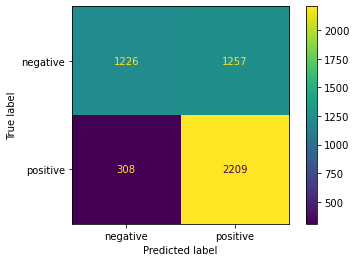

In [49]:
# Calculate Accuracy
accuracy_vader = accuracy_score(reviews['sentiment_human'], sentiment_vader)
print("Accuracy (Vader):", accuracy_vader)

# Create the confusion matrix
ConfusionMatrixDisplay.from_predictions(reviews['sentiment_human'], sentiment_vader)

## Summary
So to sum it up let us have a look what we did in this week's tutorial:

* First, we had a look at the necessary preprocessing steps (tokenization, unwanted character removal, stemming, stopword removal) needed to transform text into a more structured form.
* Secondly we performed dictionary-based sentiment analysis where we looked up the sentiment of each token in a dict and aggregated the scores in order to decide whether a review is positive or negative.
* Lastly we used known evaluation metrics for classification to evaluate our model.
* Additionaly we had a little excursion of using the pre-trained VADER model and evaluating the performance.


You can use the cell below to perform and evaluate different sentiment analyses

In [ ]:
# Enter your Code here!